# Elastic Rod Model

In [1]:
from IPython.display import display, Markdown
import random
def latexify(x):
    out = '$' + x + '$'
    return out

def lprint(x):
    display(Markdown(latexify(latex(x))))
    
%run -i 'implicit.py'

In this notebook a discretisation of the elastic rod bifurcation problem will be investigated

https://pubs.rsc.org/en/content/chapterhtml/2015/bk9781849738132-00001?isbn=978-1-84973-813-2&sercode=bk

derives a system of equations that correspond to a period truss network model for an elastic rod.

In [2]:
def get_funcs(n, k = 1, f = None, fix_end_y = True):
    # returns a set of equations to solve
    if f is None:
        var('x')
        f = x # default spring energy function
        
    var_dict = {}
    for i in range(0,n+1):
        # create a grid
        # Pij is the displacement from the point (i,j) on the grid
        # then split into x,y position of where that point goes
        var_dict['p{}0x'.format(i)] = var('p{}0x'.format(i))
        var_dict['p{}0y'.format(i)] = var('p{}0y'.format(i))
        var_dict['p{}1x'.format(i)] = var('p{}1x'.format(i))
        var_dict['p{}1y'.format(i)] = var('p{}1y'.format(i))
        
    # enforce fixed points at left side of truss network
    var_dict['p00x'] = 0
    var_dict['p00y'] = 0
    var_dict['p01x'] = 0
    var_dict['p01y'] = 0 
    
    if fix_end_y == True:
        var_dict['p{}0y'.format(n)] = 0
        var_dict['p{}1y'.format(n)] = 0 
    
    #var_dict['p{}0x'.format(n)] = 0 # really n
    #var_dict['p{}0y'.format(n)] = 0
    #var_dict['p{}1x'.format(n)] = 0 # really n
    #var_dict['p{}1y'.format(n)] = 0 # really 1
    
    var_dict['l'] = var('l', latex_name=r'\lambda') # lamdba force variable
    
    # so after constraints at endpoints we have 4(n-1) uknowns
    
    funcs = []
    e_truss = 0
    for j in range(1,n+1):
        # iterate through each square in the truss
        # get the length of each of the five springs
        
        top_x = 1 + var_dict['p{}1x'.format(j)] - var_dict['p{}1x'.format(j-1)]
        top_y = var_dict['p{}1y'.format(j)] - var_dict['p{}1y'.format(j-1)]  
        top = f(sqrt(top_x^2 + top_y^2))
        
        right_x = var_dict['p{}1x'.format(j)] - var_dict['p{}0x'.format(j)] 
        right_y = 1 + var_dict['p{}1y'.format(j)] - var_dict['p{}0y'.format(j)] 
        right = f(sqrt(right_x^2 + right_y^2))
 
        bottom_x = 1 + var_dict['p{}0x'.format(j)] - var_dict['p{}0x'.format(j-1)]
        bottom_y = var_dict['p{}0y'.format(j)] - var_dict['p{}0y'.format(j-1)]  
        bottom = f(sqrt(bottom_x^2 + bottom_y^2))
        
        
        # \ spring
        diag1_x = 1 + var_dict['p{}0x'.format(j)] - var_dict['p{}1x'.format(j-1)]
        diag1_y = 1 + var_dict['p{}1y'.format(j-1)] - var_dict['p{}0y'.format(j)]
        diag1 = f(sqrt(diag1_x^2 + diag1_y^2)/sqrt(2)) # scale by root 2
        
        
        # / spring
        diag2_x = 1 + var_dict['p{}1x'.format(j)] - var_dict['p{}0x'.format(j-1)]
        diag2_y = 1 + var_dict['p{}1y'.format(j)] - var_dict['p{}0y'.format(j-1)]
        diag2 = f(sqrt(diag1_x^2 + diag1_y^2)/sqrt(2)) # so that zero is indeed a solution 
        
        e_truss = e_truss + top + right + bottom + diag1 + diag2
        
        
    #print(e_truss)
    #e_truss = e_truss + var_dict['l'] * (var_dict['p{}1x'.format(n)]) 
                                          
    #e_truss = e_truss + var_dict['l'] * (var_dict['p{}0x'.format(n)])
    
                                                 
    # add work done by a force lambda
        
    # solutions will be local minima of the energy equation
    for j in range(1,n):
        # only care about 1,...,n
        # 0 and n are fixed points
        funcs.append(e_truss.diff(var_dict['p{}0x'.format(j)]))
        funcs.append(e_truss.diff(var_dict['p{}0y'.format(j)]))
        funcs.append(e_truss.diff(var_dict['p{}1x'.format(j)]))
        funcs.append(e_truss.diff(var_dict['p{}1y'.format(j)]))
        
    funcs.append(e_truss.diff(var_dict['p{}1x'.format(n)]) - var_dict['l'] * (var_dict['p{}1x'.format(n)]) ) 
    funcs.append(e_truss.diff(var_dict['p{}0x'.format(n)]) - var_dict['l'] * (var_dict['p{}0x'.format(n)]) )
    
    if fix_end_y is False:
        funcs.append(e_truss.diff(var_dict['p{}1y'.format(n)]))
        funcs.append(e_truss.diff(var_dict['p{}0y'.format(n)]))
        
    return funcs, var_dict
    

In [3]:
funcs, var_dict = get_funcs(2,f = (x-1)^2)

implicit.py:1: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  from math import factorial


In [4]:
var_dict

{'p00x': 0,
 'p00y': 0,
 'p01x': 0,
 'p01y': 0,
 'p10x': p10x,
 'p10y': p10y,
 'p11x': p11x,
 'p11y': p11y,
 'p20x': p20x,
 'p20y': 0,
 'p21x': p21x,
 'p21y': 0,
 'l': l}

In [5]:
lprint(funcs[5](0,0,0,0,0,0,0))

$ 0 $

In [6]:
len(funcs)

6

In [7]:
lprint(funcs[5])

$ -\frac{\sqrt{2} {\left(\sqrt{2} \sqrt{{\left(\mathit{p11x} - \mathit{p20x} - 1\right)}^{2} + {\left(\mathit{p11y} + 1\right)}^{2}} - 2\right)} {\left(\mathit{p11x} - \mathit{p20x} - 1\right)}}{\sqrt{{\left(\mathit{p11x} - \mathit{p20x} - 1\right)}^{2} + {\left(\mathit{p11y} + 1\right)}^{2}}} - {\lambda} \mathit{p20x} - \frac{2 \, {\left(\mathit{p10x} - \mathit{p20x} - 1\right)} {\left(\sqrt{{\left(\mathit{p10x} - \mathit{p20x} - 1\right)}^{2} + \mathit{p10y}^{2}} - 1\right)}}{\sqrt{{\left(\mathit{p10x} - \mathit{p20x} - 1\right)}^{2} + \mathit{p10y}^{2}}} + \frac{2 \, {\left(\mathit{p20x} - \mathit{p21x}\right)} {\left(\sqrt{{\left(\mathit{p20x} - \mathit{p21x}\right)}^{2} + 1} - 1\right)}}{\sqrt{{\left(\mathit{p20x} - \mathit{p21x}\right)}^{2} + 1}} $

In [8]:
old_var = var_dict
var_dict = {key : var_dict[key] for key in var_dict.keys() if var_dict[key] != 0}
var_dict = {key : var_dict[key] for key in var_dict.keys() if key != 'l'}

J = jacobian(funcs,tuple(var_dict.values()))(**{var : 0 for var in var_dict.keys()})
lprint(J)

$ \left(\begin{array}{rrrrrr}
5 & -1 & 0 & 0 & -2 & 0 \\
-1 & 3 & 0 & -2 & 0 & 0 \\
0 & 0 & 5 & -1 & -1 & -2 \\
0 & -2 & -1 & 3 & 1 & 0 \\
0 & 0 & -2 & 0 & 0 & -{\lambda} + 2 \\
-2 & 0 & -1 & 1 & -{\lambda} + 3 & 0
\end{array}\right) $

In [9]:
lprint(det(matrix(J))) # potential bifurcation point

$ -96 \, {\lambda}^{2} + 272 \, {\lambda} - 176 $

In [10]:
lprint(solve(det(matrix(J)), l))

$ \left[{\lambda} = 1, {\lambda} = \left(\frac{11}{6}\right)\right] $

In [11]:
#bif_funcs = [func(l = 2/((32*sqrt(2)) + 36)) for func in funcs] #
#bif_funcs = [func(l = (sqrt(2)*(9/4))/((225*sqrt(2))/2 + 108)) for func in funcs] #
bif_funcs = [func(l = 11/6) for func in funcs]
#var_dict['l'] = old_var['l']
J = jacobian(bif_funcs,tuple(var_dict.values()))(**{var : 0 for var in var_dict.keys()})

lprint(J)

$ \left(\begin{array}{rrrrrr}
5 & -1 & 0 & 0 & -2 & 0 \\
-1 & 3 & 0 & -2 & 0 & 0 \\
0 & 0 & 5 & -1 & -1 & -2 \\
0 & -2 & -1 & 3 & 1 & 0 \\
0 & 0 & -2 & 0 & 0 & \frac{1}{6} \\
-2 & 0 & -1 & 1 & \frac{7}{6} & 0
\end{array}\right) $

In [12]:
lprint(det(J))

$ 0 $

### Orthogonalising the kernel

In [13]:
K = J.right_kernel().basis()
lprint(K)

$ \left[\left(1,\,-\frac{7}{13},\,-\frac{1}{13},\,-\frac{17}{13},\,\frac{36}{13},\,-\frac{12}{13}\right)\right] $

In [14]:
Kperp = matrix(K).right_kernel().basis()
lprint(Kperp)

$ \left[\left(1,\,0,\,0,\,0,\,0,\,\frac{13}{12}\right), \left(0,\,1,\,0,\,0,\,0,\,-\frac{7}{12}\right), \left(0,\,0,\,1,\,0,\,0,\,-\frac{1}{12}\right), \left(0,\,0,\,0,\,1,\,0,\,-\frac{17}{12}\right), \left(0,\,0,\,0,\,0,\,1,\,3\right)\right] $

In [15]:
A = matrix(K+Kperp).inverse().apply_map(lambda x: x.full_simplify())
lprint(A)

$ \left(\begin{array}{rrrrrr}
\frac{169}{1948} & \frac{1779}{1948} & \frac{91}{1948} & \frac{13}{1948} & \frac{221}{1948} & -\frac{117}{487} \\
-\frac{91}{1948} & \frac{91}{1948} & \frac{1899}{1948} & -\frac{7}{1948} & -\frac{119}{1948} & \frac{63}{487} \\
-\frac{13}{1948} & \frac{13}{1948} & -\frac{7}{1948} & \frac{1947}{1948} & -\frac{17}{1948} & \frac{9}{487} \\
-\frac{221}{1948} & \frac{221}{1948} & -\frac{119}{1948} & -\frac{17}{1948} & \frac{1659}{1948} & \frac{153}{487} \\
\frac{117}{487} & -\frac{117}{487} & \frac{63}{487} & \frac{9}{487} & \frac{153}{487} & \frac{163}{487} \\
-\frac{39}{487} & \frac{39}{487} & -\frac{21}{487} & -\frac{3}{487} & -\frac{51}{487} & \frac{108}{487}
\end{array}\right) $

In [16]:
key_list = [str(var) for var in var_dict.values()]
value_list = list(A*vector(var_dict.values()))
mutate_dict = dict(zip(key_list, value_list))

In [17]:
mutate_dict

{'p10x': 169/1948*p10x + 1779/1948*p10y + 91/1948*p11x + 13/1948*p11y + 221/1948*p20x - 117/487*p21x,
 'p10y': -91/1948*p10x + 91/1948*p10y + 1899/1948*p11x - 7/1948*p11y - 119/1948*p20x + 63/487*p21x,
 'p11x': -13/1948*p10x + 13/1948*p10y - 7/1948*p11x + 1947/1948*p11y - 17/1948*p20x + 9/487*p21x,
 'p11y': -221/1948*p10x + 221/1948*p10y - 119/1948*p11x - 17/1948*p11y + 1659/1948*p20x + 153/487*p21x,
 'p20x': 117/487*p10x - 117/487*p10y + 63/487*p11x + 9/487*p11y + 153/487*p20x + 163/487*p21x,
 'p21x': -39/487*p10x + 39/487*p10y - 21/487*p11x - 3/487*p11y - 51/487*p20x + 108/487*p21x}

In [18]:
Afuncs = [func(**mutate_dict) for func in bif_funcs]

In [19]:
#lprint(Afuncs) 

In [20]:
Ja = jacobian(Afuncs,tuple(var_dict.values()))(**{var : 0 for var in var_dict.keys()}).apply_map(lambda x: x.full_simplify())
lprint(Ja)

$ \left(\begin{array}{rrrrrr}
0 & 5 & -1 & 0 & 0 & -2 \\
0 & -1 & 3 & 0 & -2 & 0 \\
0 & 0 & 0 & 5 & -1 & -1 \\
0 & 0 & -2 & -1 & 3 & 1 \\
0 & 0 & 0 & -2 & 0 & 0 \\
0 & -2 & 0 & -1 & 1 & \frac{7}{6}
\end{array}\right) $

In [21]:
Ka = Ja(l=0).right_kernel().basis()
lprint(Ka)

$ \left[\left(1,\,0,\,0,\,0,\,0,\,0\right)\right] $

### Orthogonalising the image

In [22]:
I = Ja.image().basis()
I = [Ja*vec for vec in I]
print(len(I))

5


In [91]:
Iperp = matrix(I).right_kernel().basis()
lprint(Iperp)

$ \left[\left(1,\,-\frac{7}{13},\,-\frac{1}{13},\,-\frac{17}{13},\,-\frac{12}{13},\,\frac{36}{13}\right)\right] $

In [24]:
B = matrix(I + Iperp).inverse().apply_map(lambda x: x.full_simplify())
lprint(B)

$ \left(\begin{array}{rrrrrr}
-\frac{35}{1948} & \frac{301}{974} & -\frac{39}{974} & \frac{875}{1948} & -\frac{639}{974} & \frac{169}{1948} \\
-\frac{131}{1948} & \frac{737}{974} & \frac{21}{974} & \frac{1327}{1948} & -\frac{555}{974} & -\frac{91}{1948} \\
-\frac{1271}{1948} & \frac{157}{487} & \frac{3}{974} & \frac{1581}{1948} & -\frac{1749}{974} & -\frac{13}{1948} \\
-\frac{179}{1948} & \frac{234}{487} & \frac{51}{974} & \frac{1553}{1948} & -\frac{513}{974} & -\frac{221}{1948} \\
-\frac{1295}{974} & \frac{359}{974} & -\frac{451}{974} & \frac{1207}{974} & -\frac{1728}{487} & -\frac{39}{487} \\
-\frac{249}{487} & \frac{192}{487} & -\frac{54}{487} & \frac{381}{487} & -\frac{660}{487} & \frac{117}{487}
\end{array}\right) $

In [25]:
tfuncs = vector(Afuncs)*B

In [26]:
#lprint(tfuncs)

In [27]:
Jt = jacobian(tfuncs,tuple(var_dict.values()))(**{var : 0 for var in var_dict.keys()}).apply_map(lambda x: x.full_simplify())

In [28]:
var_dict.values()

dict_values([p10x, p10y, p11x, p11y, p20x, p21x])

In [29]:
lprint(Jt)

$ \left(\begin{array}{rrrrrr}
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right) $

In [30]:
It = Jt.image().basis()
It = [Jt*vec for vec in It]
lprint(It)

$ \left[\left(1,\,0,\,0,\,0,\,0,\,0\right), \left(0,\,1,\,0,\,0,\,0,\,0\right), \left(0,\,0,\,1,\,0,\,0,\,0\right), \left(0,\,0,\,0,\,1,\,0,\,0\right), \left(0,\,0,\,0,\,0,\,1,\,0\right)\right] $

## Adding lambda back in

In [31]:
tfuncs = vector([func(**mutate_dict)(l = l + 11/6) for func in funcs])*B # now lambda is not fixed at the bifurcation point
# but we do shift so that l=0 is the new bifurcation
var_dict['l'] = l

In [32]:
var_dict_old = var_dict
var_dict_old

{'p10x': p10x,
 'p10y': p10y,
 'p11x': p11x,
 'p11y': p11y,
 'p20x': p20x,
 'p21x': p21x,
 'l': l}

In [33]:
var_dict.values()

dict_values([p10x, p10y, p11x, p11y, p20x, p21x, l])

## Running the implicit function theorem

In [34]:
position = {key : 0 for key in var_dict_old.keys()}
position

{'p10x': 0, 'p10y': 0, 'p11x': 0, 'p11y': 0, 'p20x': 0, 'p21x': 0, 'l': 0}

In [35]:
#code_funcs = [tfuncs[index].function(*list(var_dict_old.values())) for index in [0,1,2,3,4,5,6]] # careful with computer science indexing from zero
code_funcs = [tfuncs[index] for index in [0,1,2,3,4]] # the last function has degenerate first derivative always
position = {key : 0 for key in var_dict_old.keys()}
# var_dict already loaded
var_dict = {'y1' : p10y, 'y2' : p11x, 'y3' : p11y, 'y4' : p20x, 'y5' : p21x, 'x1' : l, 'x2' : p10x}
x_var_keys = ['l', 'p10x'] # the variables in the kernel
x_dim = 2
y_dim = 5 # invertible part

In [36]:
var_dict.keys()

dict_keys(['y1', 'y2', 'y3', 'y4', 'y5', 'x1', 'x2'])

In [37]:
t_dict = TensorDict(code_funcs, position, var_dict, x_dim, y_dim)

computing Taylor approximaton to 3 order for speedup


In [38]:
out = get_hkx_polynomial(code_funcs, 3, x_dim, y_dim, var_dict, x_var_keys, t_dict, position)

100%|██████████| 1/1 [00:00<00:00,  1.39it/s]


[1 0 0 0 0]
[0 1 0 0 0]
[0 0 1 0 0]
[0 0 0 1 0]
[0 0 0 0 1]


100%|██████████| 4/4 [00:15<00:00,  3.76s/it]


[1 0 0 0 0]
[0 1 0 0 0]
[0 0 1 0 0]
[0 0 0 1 0]
[0 0 0 0 1]


100%|██████████| 14/14 [01:44<00:00,  7.47s/it]


[1 0 0 0 0]
[0 1 0 0 0]
[0 0 1 0 0]
[0 0 0 1 0]
[0 0 0 0 1]


In [39]:
lprint(out)

$ \left[\frac{1862565120}{56249134561} \, {\lambda}^{2} \mathit{p10x} - \frac{17346425759091}{219146628249656} \, {\lambda} \mathit{p10x}^{2} - \frac{14618050990631439}{853795263660659776} \, \mathit{p10x}^{3} - \frac{7761}{474338} \, {\lambda} \mathit{p10x} + \frac{72142889}{3696041696} \, \mathit{p10x}^{2}, \frac{238153032}{56249134561} \, {\lambda}^{2} \mathit{p10x} + \frac{861229437237}{219146628249656} \, {\lambda} \mathit{p10x}^{2} - \frac{1722560570301233}{426897631830329888} \, \mathit{p10x}^{3} + \frac{30927}{474338} \, {\lambda} \mathit{p10x} - \frac{21736273}{3696041696} \, \mathit{p10x}^{2}, \frac{849398472}{56249134561} \, {\lambda}^{2} \mathit{p10x} - \frac{5145339199689}{219146628249656} \, {\lambda} \mathit{p10x}^{2} - \frac{8210817073476069}{853795263660659776} \, \mathit{p10x}^{3} + \frac{4953}{474338} \, {\lambda} \mathit{p10x} + \frac{40662583}{3696041696} \, \mathit{p10x}^{2}, -\frac{822298464}{56249134561} \, {\lambda}^{2} \mathit{p10x} + \frac{15796955492487}{219146628249656} \, {\lambda} \mathit{p10x}^{2} + \frac{3581788524456935}{426897631830329888} \, \mathit{p10x}^{3} + \frac{42081}{474338} \, {\lambda} \mathit{p10x} - \frac{112245575}{3696041696} \, \mathit{p10x}^{2}, \frac{4998363552}{56249134561} \, {\lambda}^{2} \mathit{p10x} - \frac{5438284088679}{27393328531207} \, {\lambda} \mathit{p10x}^{2} - \frac{4834400363378001}{106724407957582472} \, \mathit{p10x}^{3} - \frac{9828}{237169} \, {\lambda} \mathit{p10x} + \frac{19446999}{462005212} \, \mathit{p10x}^{2}\right] $

## Testing the implicit function theorem

In [40]:
subbed = [func(p10y = out[0], p11x = out[1], p11y = out[2], p20x = out[3], p21x = out[4]) for func in tfuncs]

In [41]:
[float(func(l = 0.1, p10x = 0.1)) for func in subbed]

[-2.478087648367228e-05,
 3.075029642342353e-06,
 -5.787273457645353e-06,
 2.9851252631746695e-05,
 -5.8006366546048274e-05,
 -0.000536909038703223]

the last function remains to be solved

### Looking for more solutions

Now substitute this into the equation that had degenerate image

In [42]:
loc = [(value,0) for value in var_dict_old.values() ] + [3]
print(loc)

[(p10x, 0), (p10y, 0), (p11x, 0), (p11y, 0), (p20x, 0), (p21x, 0), (l, 0), 3]


In [43]:
#lprint(taylor(tfuncs[5], *loc))

In [44]:
tf_taylor = tfuncs[5].taylor(*[(key,value) for key,value in position.items()],3)
#lprint(tf_taylor.polynomial(SR))

In [45]:
#var_dict_old

In [46]:
tf_sub = tf_taylor(p10y = out[0], p11x = out[1], p11y = out[2], p20x = out[3], p21x = out[4])

In [98]:
local = symbolic_expression(sum([a[0]*a[1] for a in tf_sub.polynomial(SR) if a[1].degree() <= 2]))
#local = tf_sub.polynomial(SR).truncate(4)
lprint(local)

$ -\frac{15210}{237169} \, {\lambda} \mathit{p10x} + \frac{9141717}{924010424} \, \mathit{p10x}^{2} $

We see that this will have solutions, therefore the point $\lambda$ is indeed a bifurcation point, and if we fix the $p10x$ variable at zero then $\lambda$ will span the local solutions.

In [99]:
lprint(solve(local, p10x))

$ \left[\mathit{p10x} = \frac{116880}{18031} \, {\lambda}, \mathit{p10x} = 0\right] $

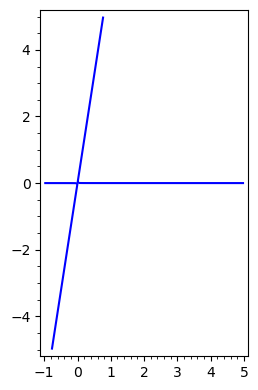

In [100]:
implicit_plot(local, (-1,5), (-5,5))

seems to be a new strand of solutions, the looping back behaviour is likely a quirk of the choice of 3rd degree restriction

### Generating more solutions

We have solved $f \circ A$ where $A$ orthogonalised the kernel, thus by applying $A$ we can get a traversel of the new solutions.

In [147]:
eps = 0.01

In [148]:
strand = solve(local, p10x)[0].rhs()

out2 = [exp(p10x = strand) for exp in out]
sols = [strand] + out2
#[sol(l = 0.01) for sol in sols]

#sols = [0.1] + [exp(p10x = 0.1, l = 0.1) for exp in out]
#[sol(l = 0.001) for sol in sols]
#lprint(sols)

In [149]:
strand

116880/18031*l

In [150]:
strand(l = eps) # the big scaling means we need to choose a very small lambda

0.0648216959680550

In [151]:
#subbed = [func(p10y = out[0], p11x = out[1], p11y = out[2], p20x = out[3], p21x = out[4]) for func in tfuncs]

subbed = [func(p10x = sols[0], p10y = sols[1], p11x = sols[2], p11y = sols[3], p20x = sols[4], p21x = sols[5]) for func in tfuncs]
[float(func(l = eps)) for func in subbed]

[-4.688088363526545e-07,
 -7.820094548591575e-07,
 -4.07472064792541e-07,
 -1.026162221428456e-08,
 -5.740146634006325e-07,
 2.6668599663525958e-06]

In [152]:
#lprint(A*vector(sols))

In [153]:
fsols = list(A*vector(sols)(l = eps))
fsols

[0.00564430137578377,
 -0.00298832752749882,
 -0.000379794066442600,
 -0.00736267478843593,
 0.0155840544804703,
 -0.00515138418668753]

In [154]:
#fsols = [random.random()/1000 for i in range(0,6)] # can check these are giving solutions

In [155]:
coords = { list(var_dict_old.keys())[i] : fsols[i] for i in [0,1,2,3,4,5] }
coords['l'] = eps
coords

{'p10x': 0.00564430137578377,
 'p10y': -0.00298832752749882,
 'p11x': -0.000379794066442600,
 'p11y': -0.00736267478843593,
 'p20x': 0.0155840544804703,
 'p21x': -0.00515138418668753,
 'l': 0.0100000000000000}

In [156]:
funcs[0].function(*list(var_dict_old.values()))(**coords)

0.708041155045321*sqrt(2)*(1.42031899446779*sqrt(2) - 2) - 0.00864354153019233

In [157]:
sym_funcs = [func.function(*list(var_dict_old.values())) for func in funcs] # convert to symbolic functions

In [158]:
[float(func(**coords)) for func in sym_funcs]

[2.252854566757098e-06,
 -3.2926978045834387e-06,
 -1.6582271128683101e-06,
 -2.120740818813832e-06,
 -0.00944585111502315,
 0.028578816842546872]

In [137]:
lprint(A)

$ \left(\begin{array}{rrrrrr}
\frac{169}{1948} & \frac{1779}{1948} & \frac{91}{1948} & \frac{13}{1948} & \frac{221}{1948} & -\frac{117}{487} \\
-\frac{91}{1948} & \frac{91}{1948} & \frac{1899}{1948} & -\frac{7}{1948} & -\frac{119}{1948} & \frac{63}{487} \\
-\frac{13}{1948} & \frac{13}{1948} & -\frac{7}{1948} & \frac{1947}{1948} & -\frac{17}{1948} & \frac{9}{487} \\
-\frac{221}{1948} & \frac{221}{1948} & -\frac{119}{1948} & -\frac{17}{1948} & \frac{1659}{1948} & \frac{153}{487} \\
\frac{117}{487} & -\frac{117}{487} & \frac{63}{487} & \frac{9}{487} & \frac{153}{487} & \frac{163}{487} \\
-\frac{39}{487} & \frac{39}{487} & -\frac{21}{487} & -\frac{3}{487} & -\frac{51}{487} & \frac{108}{487}
\end{array}\right) $

In [63]:
lprint(sym_funcs[0])

$ \left( \mathit{p10x}, \mathit{p10y}, \mathit{p11x}, \mathit{p11y}, \mathit{p20x}, \mathit{p21x}, {\lambda} \right) \ {\mapsto} \ \frac{\sqrt{2} {\left(\sqrt{2} \sqrt{{\left(\mathit{p10x} + 1\right)}^{2} + {\left(\mathit{p10y} - 1\right)}^{2}} - 2\right)} {\left(\mathit{p10x} + 1\right)}}{\sqrt{{\left(\mathit{p10x} + 1\right)}^{2} + {\left(\mathit{p10y} - 1\right)}^{2}}} + \frac{2 \, {\left(\mathit{p10x} - \mathit{p11x}\right)} {\left(\sqrt{{\left(\mathit{p10x} - \mathit{p11x}\right)}^{2} + {\left(\mathit{p10y} - \mathit{p11y} - 1\right)}^{2}} - 1\right)}}{\sqrt{{\left(\mathit{p10x} - \mathit{p11x}\right)}^{2} + {\left(\mathit{p10y} - \mathit{p11y} - 1\right)}^{2}}} + \frac{2 \, {\left(\mathit{p10x} - \mathit{p20x} - 1\right)} {\left(\sqrt{{\left(\mathit{p10x} - \mathit{p20x} - 1\right)}^{2} + \mathit{p10y}^{2}} - 1\right)}}{\sqrt{{\left(\mathit{p10x} - \mathit{p20x} - 1\right)}^{2} + \mathit{p10y}^{2}}} + \frac{2 \, {\left(\mathit{p10x} + 1\right)} {\left(\sqrt{{\left(\mathit{p10x} + 1\right)}^{2} + \mathit{p10y}^{2}} - 1\right)}}{\sqrt{{\left(\mathit{p10x} + 1\right)}^{2} + \mathit{p10y}^{2}}} $

In [64]:
mutate_dict

{'p10x': 169/1948*p10x + 1779/1948*p10y + 91/1948*p11x + 13/1948*p11y + 221/1948*p20x - 117/487*p21x,
 'p10y': -91/1948*p10x + 91/1948*p10y + 1899/1948*p11x - 7/1948*p11y - 119/1948*p20x + 63/487*p21x,
 'p11x': -13/1948*p10x + 13/1948*p10y - 7/1948*p11x + 1947/1948*p11y - 17/1948*p20x + 9/487*p21x,
 'p11y': -221/1948*p10x + 221/1948*p10y - 119/1948*p11x - 17/1948*p11y + 1659/1948*p20x + 153/487*p21x,
 'p20x': 117/487*p10x - 117/487*p10y + 63/487*p11x + 9/487*p11y + 153/487*p20x + 163/487*p21x,
 'p21x': -39/487*p10x + 39/487*p10y - 21/487*p11x - 3/487*p11y - 51/487*p20x + 108/487*p21x}

In [65]:
lprint(sym_funcs[4])

$ \left( \mathit{p10x}, \mathit{p10y}, \mathit{p11x}, \mathit{p11y}, \mathit{p20x}, \mathit{p21x}, {\lambda} \right) \ {\mapsto} \ -{\lambda} \mathit{p21x} - \frac{2 \, {\left(\mathit{p11x} - \mathit{p21x} - 1\right)} {\left(\sqrt{{\left(\mathit{p11x} - \mathit{p21x} - 1\right)}^{2} + \mathit{p11y}^{2}} - 1\right)}}{\sqrt{{\left(\mathit{p11x} - \mathit{p21x} - 1\right)}^{2} + \mathit{p11y}^{2}}} - \frac{2 \, {\left(\mathit{p20x} - \mathit{p21x}\right)} {\left(\sqrt{{\left(\mathit{p20x} - \mathit{p21x}\right)}^{2} + 1} - 1\right)}}{\sqrt{{\left(\mathit{p20x} - \mathit{p21x}\right)}^{2} + 1}} $